In [4]:
import time
from sklearn.datasets import load_iris, fetch_20newsgroups, fetch_california_housing
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.neighbors import KNeighborsClassifier
from sklearn.preprocessing import StandardScaler
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.naive_bayes import MultinomialNB
from sklearn.metrics import classification_report
from sklearn.feature_extraction import DictVectorizer
from sklearn.tree import DecisionTreeClassifier, export_graphviz
from sklearn.ensemble import RandomForestClassifier
import pandas as pd
import numpy as np
from sklearn.metrics import roc_auc_score

In [5]:
#鸢尾花数据集，查看特征，目标，样本量

li = load_iris()

print("获取特征值")
print(type(li.data))
print('-' * 50)
print(li.data.shape) # 150个样本，4个特征,一般看shape
li.data

获取特征值
<class 'numpy.ndarray'>
--------------------------------------------------
(150, 4)


array([[5.1, 3.5, 1.4, 0.2],
       [4.9, 3. , 1.4, 0.2],
       [4.7, 3.2, 1.3, 0.2],
       [4.6, 3.1, 1.5, 0.2],
       [5. , 3.6, 1.4, 0.2],
       [5.4, 3.9, 1.7, 0.4],
       [4.6, 3.4, 1.4, 0.3],
       [5. , 3.4, 1.5, 0.2],
       [4.4, 2.9, 1.4, 0.2],
       [4.9, 3.1, 1.5, 0.1],
       [5.4, 3.7, 1.5, 0.2],
       [4.8, 3.4, 1.6, 0.2],
       [4.8, 3. , 1.4, 0.1],
       [4.3, 3. , 1.1, 0.1],
       [5.8, 4. , 1.2, 0.2],
       [5.7, 4.4, 1.5, 0.4],
       [5.4, 3.9, 1.3, 0.4],
       [5.1, 3.5, 1.4, 0.3],
       [5.7, 3.8, 1.7, 0.3],
       [5.1, 3.8, 1.5, 0.3],
       [5.4, 3.4, 1.7, 0.2],
       [5.1, 3.7, 1.5, 0.4],
       [4.6, 3.6, 1. , 0.2],
       [5.1, 3.3, 1.7, 0.5],
       [4.8, 3.4, 1.9, 0.2],
       [5. , 3. , 1.6, 0.2],
       [5. , 3.4, 1.6, 0.4],
       [5.2, 3.5, 1.5, 0.2],
       [5.2, 3.4, 1.4, 0.2],
       [4.7, 3.2, 1.6, 0.2],
       [4.8, 3.1, 1.6, 0.2],
       [5.4, 3.4, 1.5, 0.4],
       [5.2, 4.1, 1.5, 0.1],
       [5.5, 4.2, 1.4, 0.2],
       [4.9, 3

In [12]:
print("目标值")
print(li.target)
print('-' * 50)
print(np.unique(li.target))
print(li.DESCR)
print('-' * 50)
print(li.feature_names)  # 重点,特征名字
print('-' * 50)
print(li.target_names) # 目标名字

目标值
[0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 2 2 2 2 2 2 2 2 2 2 2
 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2
 2 2]
--------------------------------------------------
[0 1 2]
.. _iris_dataset:

Iris plants dataset
--------------------

**Data Set Characteristics:**

:Number of Instances: 150 (50 in each of three classes)
:Number of Attributes: 4 numeric, predictive attributes and the class
:Attribute Information:
    - sepal length in cm
    - sepal width in cm
    - petal length in cm
    - petal width in cm
    - class:
            - Iris-Setosa
            - Iris-Versicolour
            - Iris-Virginica

:Summary Statistics:

============== ==== ==== ======= ===== ====================
                Min  Max   Mean    SD   Class Correlation
============== ==== ==== ======= ===== ============

In [13]:
import os

from sklearn.datasets import fetch_california_housing
from sklearn.linear_model import LinearRegression, SGDRegressor, Ridge, LogisticRegression, Lasso
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import mean_squared_error, classification_report, roc_auc_score
import joblib
import pandas as pd
import numpy as np

In [15]:
"""
线性回归直接预测房子价格
:return: None
"""
# 获取数据
fe_cal = fetch_california_housing(data_home='../python_ml/data')

print("获取特征值")
print(fe_cal.data.shape)
print('-' * 50)
print(fe_cal.data[0])
print("目标值")
print(fe_cal.target) #单位是10万美金
print(fe_cal.DESCR)
print('-' * 50)
print(fe_cal.feature_names) #特征列的名字

获取特征值
(20640, 8)
--------------------------------------------------
[   8.3252       41.            6.98412698    1.02380952  322.
    2.55555556   37.88       -122.23      ]
目标值
[4.526 3.585 3.521 ... 0.923 0.847 0.894]
.. _california_housing_dataset:

California Housing dataset
--------------------------

**Data Set Characteristics:**

:Number of Instances: 20640

:Number of Attributes: 8 numeric, predictive attributes and the target

:Attribute Information:
    - MedInc        median income in block group
    - HouseAge      median house age in block group
    - AveRooms      average number of rooms per household
    - AveBedrms     average number of bedrooms per household
    - Population    block group population
    - AveOccup      average number of household members
    - Latitude      block group latitude
    - Longitude     block group longitude

:Missing Attribute Values: None

This dataset was obtained from the StatLib repository.
https://www.dcc.fc.up.pt/~ltorgo/Regression/

MedInc - 中位收入（Median Income）
HouseAge - 房屋年龄（House Age）
AveRooms - 平均房间数（Average Number of Rooms）
AveBedrms - 平均卧室数（Average Number of Bedrooms）
Population - 人口数量（Population）
AveOccup - 平均居住人数（Average Occupancy）
Latitude - 纬度（Latitude）
Longitude - 经度（Longitude）

In [16]:
fe_cal.target.shape

(20640,)

In [17]:
x_train, x_test, y_train, y_test = train_test_split(fe_cal.data, fe_cal.target, test_size=0.25,random_state=1)
print(x_train.shape)
std_x = StandardScaler()
# 将训练集和测试集进行标准化
x_train = std_x.fit_transform(x_train)
x_test = std_x.transform(x_test)


(15480, 8)


In [18]:
test1=np.array([1,2,3])
print(test1.shape)
# 将一维变成二维，并且行展示的数据变成列展示的数据
test1.reshape(-1,1).shape

(3,)


(3, 1)

In [22]:
import os
# # estimator预测
# # # 正规方程求解方式预测结果，正规方程进行线性回归， 正规方程是直接解方程
lr = LinearRegression()
# fit是耗时的
lr.fit(x_train, y_train)
#回归系数可以看特征与目标之间的相关性
print('回归系数', lr.coef_)
#
y_predict = lr.predict(x_test)
# 预测测试集的房子价格，通过inverse得到真正的房子价格
# y_lr_predict = std_y.inverse_transform(y_predict)
# 保存训练好的模型，模型中保存的是w的值，也保存了模型结构
#保存模型放在fit之后即可
os.unlink('../python_ml/tmp/test.pkl') # 删除之前的模型文件
joblib.dump(lr, "../python_ml/tmp/test.pkl")
print("正规方程测试集里面每个房子的预测价格：", y_predict[0:10])
#下面是求测试集的损失，用均方误差，公式是(y_test-y_predict)^2/n
print("正规方程的均方误差：", mean_squared_error(y_test, y_predict))

回归系数 [ 0.83167028  0.12159502 -0.26758589  0.30983997 -0.00518054 -0.04040421
 -0.90736902 -0.88212727]
正规方程测试集里面每个房子的预测价格： [2.12391852 0.93825754 2.7088455  1.70873764 2.82954754 3.50376456
 3.0147162  1.62781292 1.74317518 2.01897806]
正规方程的均方误差： 0.5356532845422556


# 3 线性回归之梯度下降去进行房价预测

In [37]:
# 首先是随机给一个向量，然后根据损失是函数算梯度，求解到损失下降最快的方向， 算的梯度是所有样本的平均梯度
# Ridge 回归（岭回归）L2 正则化的本质是在损失函数中加入一个“惩罚项”，这个惩罚项是所有权重（参数）平方和的总和。是为了抑制过拟合
# Lasso回归，L1 正则化 是在模型的损失函数中加入参数绝对值的惩罚项，以此控制模型复杂度、避免过拟合。将不重要的特征压缩到0。求导时不可导，使用从梯度，即当参数大于0时为1，参数小于0时为-1，当参数在小于一定程度时会进行截断
sgd = SGDRegressor(eta0=0.0017, penalty='l2', max_iter=1000)
sgd.fit(x_train, y_train)
print('梯度下降的回归系数', sgd.coef_)
y_predict = sgd.predict(x_test)
print("梯度下降的均方误差：", mean_squared_error(y_test, y_predict))
print("准确度为：", sgd.score(x_test, y_test))

梯度下降的回归系数 [ 0.84007514  0.14235033 -0.2465776   0.28681809  0.00124201 -0.03795717
 -0.74172253 -0.72040669]
梯度下降的均方误差： 0.5385005555362731
准确度为： 0.5908234460661589


# 4 岭回归

In [39]:
# # # 岭回归去进行房价预测
#岭回归是对线性回归加入L2正则化，L2正则化是对系数的平方和进行惩罚
#alpha就是补偿的系数
#正规方程求解，加补偿就可以让正规方程可逆
rd = Ridge(alpha=0.0017)

rd.fit(x_train, y_train)

print(rd.coef_)
#
# # 预测测试集的房子价格
print(rd.predict(x_test).shape)
# y_rd_predict = std_y.inverse_transform(rd.predict(x_test))
y_predict = rd.predict(x_test)
# print("岭回归里面每个房子的预测价格：", y_rd_predict)

print("岭回归的均方误差：", mean_squared_error(y_test, y_predict))
# print("岭回归的均方误差：", mean_squared_error(std_y.inverse_transform(y_test), y_rd_predict))

[ 0.83167023  0.12159518 -0.26758559  0.30983958 -0.00518049 -0.04040422
 -0.90736759 -0.88212583]
(5160,)
岭回归的均方误差： 0.5356532703764871


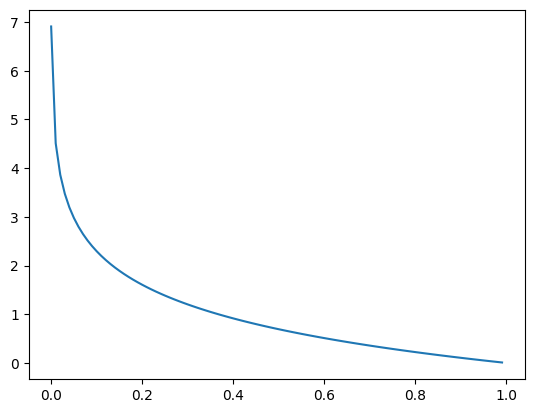

In [40]:
x=np.arange(0.001,1,0.01) #0-1之间，步长0.01
import matplotlib.pyplot as plt
plt.plot(x,-np.log(x))  #以e为底部
plt.show()

逻辑回归是一种 **分类算法**，不是回归算法，尽管名字里有“回归”二字。

它的目标是：

> 根据输入特征 $x$，预测结果属于某个类别（例如：0 或 1）。

---

## 和线性回归的区别

| 模型       | 输出             | 用途          |
| -------- | -------------- | ----------- |
| 线性回归     | 任意实数（可能是负的）    | 回归（预测连续值）   |
| **逻辑回归** | \[0, 1] 区间的概率值 | **分类（0/1）** |

---

## 逻辑回归模型公式

逻辑回归的核心是将线性回归的输出通过一个 **Sigmoid 函数** 转换为概率：

###  线性部分：

$$
z = \theta^T x + b

$$
$$
\theta 是参数，x是样本
$$
### Sigmoid 激活：

$$
\hat{y} = \sigma(z) = \frac{1}{1 + e^{-z}}
$$

结果 $\hat{y} \in (0, 1)$，表示属于类别 1 的概率。

然后你可以通过一个阈值（通常是 0.5）来判断最终分类：

$$
\hat{y} \geq 0.5 \Rightarrow 预测为 1；否则预测为 0
$$

---

## 损失函数（交叉熵）

逻辑回归用 **对数损失函数（Log Loss）**：

$$
J(\theta) = -\frac{1}{m} \sum_{i=1}^{m} \left[ y^{(i)} \log(\hat{y}^{(i)}) + (1 - y^{(i)}) \log(1 - \hat{y}^{(i)}) \right]
$$

y是真实值y $\in$ {0,1}

* 比均方误差更适合处理概率和分类问题
* 有强大的凸优化性质

---

## 举个例子（应用场景）

| 场景     | 描述                  |
| ------ | ------------------- |
| 垃圾邮件识别 | 输入一封邮件的特征，判断是否为垃圾邮件 |
| 信用评分   | 根据用户信息判断是否能还款       |
| 医疗诊断   | 根据症状预测是否患某种疾病（如癌症）  |

---

## 总结一句话：

> **逻辑回归** 是一个使用 sigmoid 函数将线性结果映射为概率，再基于概率进行二分类的模型。简单、快速、可解释，是最常用的分类算法之一。

---
> 是神经网络的基本单元


In [41]:
"""
逻辑回归做二分类进行癌症预测（根据细胞的属性特征）
:return: NOne
"""
# 构造列标签名字
column = ['Sample code number', 'Clump Thickness', 'Uniformity of Cell Size', 'Uniformity of Cell Shape',
          'Marginal Adhesion', 'Single Epithelial Cell Size', 'Bare Nuclei', 'Bland Chromatin', 'Normal Nucleoli',
          'Mitoses', 'Class']

# 读取数据
# data = pd.read_csv(
#     "https://archive.ics.uci.edu/ml/machine-learning-databases/breast-cancer-wisconsin/breast-cancer-wisconsin.data",
#     names=column)
data = pd.read_csv(
    "../python_ml/data/breast-cancer-wisconsin.csv",
    names=column)
# print(data) #想看可以解除
#当你读取数据时，看上去是数值的列，读进来是字符串，说明里边
# 存在了非数值情况
print(data.info())
print(data.describe(include='all'))

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 699 entries, 0 to 698
Data columns (total 11 columns):
 #   Column                       Non-Null Count  Dtype 
---  ------                       --------------  ----- 
 0   Sample code number           699 non-null    int64 
 1   Clump Thickness              699 non-null    int64 
 2   Uniformity of Cell Size      699 non-null    int64 
 3   Uniformity of Cell Shape     699 non-null    int64 
 4   Marginal Adhesion            699 non-null    int64 
 5   Single Epithelial Cell Size  699 non-null    int64 
 6   Bare Nuclei                  699 non-null    object
 7   Bland Chromatin              699 non-null    int64 
 8   Normal Nucleoli              699 non-null    int64 
 9   Mitoses                      699 non-null    int64 
 10  Class                        699 non-null    int64 
dtypes: int64(10), object(1)
memory usage: 60.2+ KB
None
        Sample code number  Clump Thickness  Uniformity of Cell Size  \
count         6.990000e+0

In [42]:
data['Bare Nuclei'].unique() #因为上面发现它是object类型

array(['1', '10', '2', '4', '3', '9', '7', '?', '5', '8', '6'],
      dtype=object)

In [43]:
data = data.replace(to_replace='?', value=np.nan)
data = data.dropna()
print(data.shape)

(683, 11)
(683, 11)


In [44]:
data[column[10]].unique()

array([2, 4])

In [45]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Index: 683 entries, 0 to 698
Data columns (total 11 columns):
 #   Column                       Non-Null Count  Dtype 
---  ------                       --------------  ----- 
 0   Sample code number           683 non-null    int64 
 1   Clump Thickness              683 non-null    int64 
 2   Uniformity of Cell Size      683 non-null    int64 
 3   Uniformity of Cell Shape     683 non-null    int64 
 4   Marginal Adhesion            683 non-null    int64 
 5   Single Epithelial Cell Size  683 non-null    int64 
 6   Bare Nuclei                  683 non-null    object
 7   Bland Chromatin              683 non-null    int64 
 8   Normal Nucleoli              683 non-null    int64 
 9   Mitoses                      683 non-null    int64 
 10  Class                        683 non-null    int64 
dtypes: int64(10), object(1)
memory usage: 64.0+ KB


In [46]:
data[column[6]].unique()

array(['1', '10', '2', '4', '3', '9', '7', '5', '8', '6'], dtype=object)

In [49]:
data[column[6]] = data[column[6]].astype('int64')

In [50]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Index: 683 entries, 0 to 698
Data columns (total 11 columns):
 #   Column                       Non-Null Count  Dtype
---  ------                       --------------  -----
 0   Sample code number           683 non-null    int64
 1   Clump Thickness              683 non-null    int64
 2   Uniformity of Cell Size      683 non-null    int64
 3   Uniformity of Cell Shape     683 non-null    int64
 4   Marginal Adhesion            683 non-null    int64
 5   Single Epithelial Cell Size  683 non-null    int64
 6   Bare Nuclei                  683 non-null    int64
 7   Bland Chromatin              683 non-null    int64
 8   Normal Nucleoli              683 non-null    int64
 9   Mitoses                      683 non-null    int64
 10  Class                        683 non-null    int64
dtypes: int64(11)
memory usage: 64.0 KB


In [59]:
data

,Sample code number,Clump Thickness,Uniformity of Cell Size,Uniformity of Cell Shape,Marginal Adhesion,Single Epithelial Cell Size,Bare Nuclei,Bland Chromatin,Normal Nucleoli,Mitoses,Class
0,1000025,5,1,1,1,2,1,3,1,1,2
1,1002945,5,4,4,5,7,10,3,2,1,2
2,1015425,3,1,1,1,2,2,3,1,1,2
3,1016277,6,8,8,1,3,4,3,7,1,2
4,1017023,4,1,1,3,2,1,3,1,1,2
...,...,...,...,...,...,...,...,...,...,...,...
694,776715,3,1,1,1,3,2,1,1,1,2
695,841769,2,1,1,1,2,1,1,1,1,2
696,888820,5,10,10,3,7,3,8,10,2,4
697,897471,4,8,6,4,3,4,10,6,1,4


In [61]:
# 进行数据的分割,第零列是编号，不可以作为特征，把第1-9列作为特征，第10列作为标签
x_train, x_test, y_train, y_test = train_test_split(data[column[1:10]], data[column[10]], test_size=0.25,
                                                    random_state=1)
std = StandardScaler()

x_train = std.fit_transform(x_train)
x_test = std.transform(x_test)
print(x_train[0])

[-1.21629973 -0.70863282 -0.75174943  0.04301674 -0.55657068 -0.71054972
 -0.99312055 -0.62911518 -0.36280962]


In [62]:
lr = LogisticRegression(C=0.5, solver='lbfgs')
lr.fit(x_train, y_train)
# 逻辑回归的权重参数
print(lr.coef_)

y_predict = lr.predict(x_test)
print(y_predict)
print("准确率:", lr.score(x_test, y_test))
print('-'*50)
print(lr.predict_proba(x_test)[0:5])  #得出对应分类的概率

[[1.11400191 0.25293086 0.78938469 0.60986034 0.0728013  1.10834397
  0.7794668  0.64312128 0.67692658]]
[2 2 2 4 2 4 2 2 4 4 2 2 4 2 2 4 2 2 2 2 2 2 2 4 4 2 2 2 4 4 2 2 4 4 2 4 2
 2 4 4 4 2 2 4 2 2 2 2 4 2 2 2 4 2 2 2 4 2 2 2 2 4 2 2 2 4 2 4 4 2 2 4 2 2
 4 2 2 2 2 2 2 2 4 2 4 4 2 2 2 4 2 2 4 2 2 4 4 2 2 4 2 2 4 4 2 2 2 2 4 2 4
 4 2 4 2 4 2 2 2 2 4 2 4 2 2 2 2 2 4 2 2 2 2 2 2 2 4 2 4 4 2 2 4 2 2 2 2 4
 2 2 2 2 2 4 2 4 2 4 2 2 4 2 4 2 4 4 2 4 2 2 2]
准确率: 0.9824561403508771
--------------------------------------------------
[[0.94893919 0.05106081]
 [0.99494175 0.00505825]
 [0.98365149 0.01634851]
 [0.02707911 0.97292089]
 [0.99732446 0.00267554]]


In [63]:
print(classification_report(y_test, y_predict, labels = [2, 4], target_names=["良性", "恶性"]))
print("AUC指标:", roc_auc_score(y_test, y_predict))

              precision    recall  f1-score   support

          良性       0.97      1.00      0.99       111
          恶性       1.00      0.95      0.97        60

    accuracy                           0.98       171
   macro avg       0.99      0.97      0.98       171
weighted avg       0.98      0.98      0.98       171

AUC指标: 0.975
